# **BUSI / COMP 488 Data Science in the Business World**
## *Spring 2023*  
Daniel M. Ringel    
Kenan-Flagler Business School 

*The University of North Carolina at Chapel Hill*  
dmr@unc.edu

## **Class 24** - Text Analysis IV: Large Language Models

![Text Analysiss IV Sesame Street](https://mapXP.app/BUSI488/sesamestreet.jpg "Text Analysis IV Sesame Street")

*April 18, 2023*  
Version 1.6




# Today's Agenda:

1. Sentence Embedding
2. Topic discovery with latent feature vectors
3. The Secret Sauce: Bidirectional Encoder Representations from Transformers (BERT)
4. What have Large Language Models Learned?
5. Text classification with BERT vectors
6. BERTopic - A convenient way for Topic Discovery
----

## Prep-Check:
- **Sentence Labeling Task:** Completed labeling 240 sentences using Qualtrics Linbk that was e-mailed to you.
- **Read before class:** Hartmann, J., Huppertz, J., Schamp, C., & Heitmann, M., 2019. Comparing automated text classification methods. International Journal of Research in Marketing, 36(1), 20-38.
- **Started Major Class Project:**
  - Identified Question
  - Developed Analysis Strategy
  - Identified relevant data sources
-----


# Today's Marketing Problem: Customer Experience Management

- Customer experience (CX): How firms engage with their customers at every point of the customer journey
- Sum total of all interactions a customer has with your brand
- Several Dimensions of Experiences:
  - Cognitive
  - Emotional
  - Social
  - Behavioral
  - Sensual

***So why is the customer experience so important?***

> As products become more commoditized ...  
 ... customers differentiate more based on experiences than specific product features and functions.

- Customers want to feel connected to their favorite brands
- Customers want the firms they buy from to know and respect them
- CX has become a key competitive differentiator

*Firms must ensure that their CX strategies can deliver personalized, pleasing interactions at every customer touchpoint.*

**Problem**: 
1. How can firms learn about their customers' experiences? 
  - Good experiences
  - Pain points
2. How can firms determine whether their actions improved CX?

**Idea**: Obtain a contemporary lens on CX through social media!
- Mine Twitter to learn about CX
  - pervasive
  - abundant
  - spur-of-the-moment

**Challenges**:
- Data Acquisition
- Systematic analysis of unstructured UGC
- The meaning for tweets
- Big data 
- Ambiguity - e.g., branded homonyms




# WARNING

![Warning Explicit Content](https://mapxp.app/BUSI488/pngaaa.com-1860621.png "Warning")
- In today's class we will be working with real-world data from Twitter.
- These data (i.e., tweets) were written by real people
- **Tweets can contain explicit and offensive content:**
    - Sexuality
    - Inappropriate language
    - Racism
    - Slurs

# DISCLAIMER

- The opinions and statements expressed by the tweets we might scrape
    - **Do not** represent the opinions and choice of words of your instructors, KFBS, UNC or the State of North Carolina
    - Are being analyzed solely for teaching purposes, i.e., students' development of Data Science skills 
    
# YOUR CHOICE
If you would not like to be exposed to possibly inappropriate, explicit and/or offensive content  
**YOU MAY LEAVE THIS SESSION NOW**

- Please contact your instructor after today's session so that we can develop an alternative way of conveying the content of today's class to you.

# 1 Sentence Embedding with SentenceTransformers


![SBERT](https://www.sbert.net/_static/logo.png "Sentence BERT")

***The logical extension to neural word embedding*** (such as Word2Vec from class 23) is to embed entire sentences to capture their meaning.  

- SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings. 
  * Check out the website with code examples: https://www.sbert.net/index.html
  * Here is the GitHib repository: https://github.com/UKPLab/sentence-transformers  
  * Read the research article for details: https://arxiv.org/abs/1908.10084 


- You can use this framework to compute sentence / text embeddings for more than 100 languages. 
- Sentence embeddings can be compared with cosine-similarity to find sentences with a similar meaning. 
  * Semantic search
  * Paraphrase mining
  * Clustering
  * Visualization in maps

The framework is based on PyTorch and Transformers
   * Large collection of pre-trained models tuned for various tasks. 
   * Easy to fine-tune your own models.

***That's exactly what we need to analyze entire tweets so that we can discover what people's tweets are actually about***

## 1.1 Install Sentence Transformers (SBERT)

- You can easily download and install it on CoLab or your own computer using pip install
  * 
```
pip install -U sentence-transformers
```



- To install SBERT on Apple Silicone (M1 and M2 chips), you need to use Conda: 
  * 
```
conda install -c conda-forge sentence-transformers
```

- If you want to run SBERT on a NVIDIA GPU (with Cuda), then you must install **PyTorch**
 * Open source machine learning framework that accelerates the path from research prototyping to production deployment https://pytorch.org/ 
 * **PyTorch is already installed on CoLab (Torch)**
 * To install PyTorch on your computer, visit https://pytorch.org/get-started/locally/ 
![PyTorch](https://www.mapXP.app/BUSI488/Pytorch_logo.jpg "PyTorch")

### ***GPU Support on CoLab***
- The code of this notebook will run on CPUs
- To make things faster, we can leverage GPUs
- CoLab grants us free access to GPUs
  - Click on **"Runtime"** in the menubar
  - Click on **"Change Runtime type"** in the dropdown
  - Select **"GPU"** as Hardware accelerator
  - Click **"Save"** button

  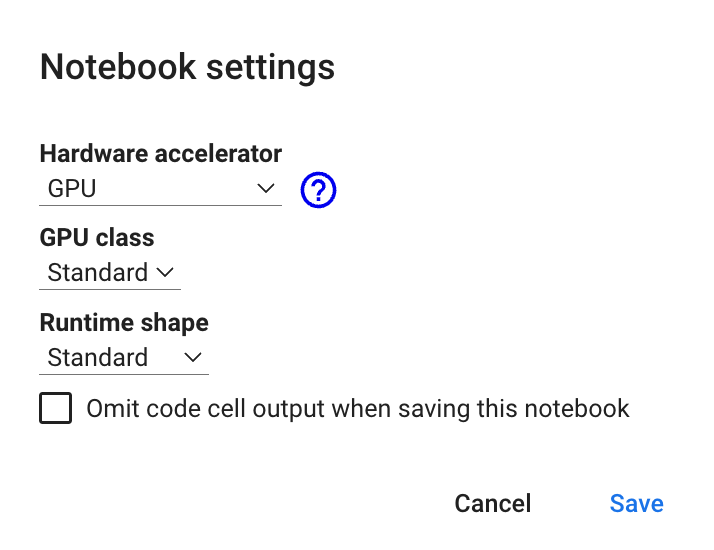

In [ ]:
# 1. Install SentenceTransformers (SBERT)
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 64.6 MB/s eta 0:00:00


## 1.2 Download a Pre-Trained SBERT Model

Now you need to 
1. import SBERT, and 
2. download a pre-trained model. 
  * **Models can be very large, i.e., over 1GB of data!**  
  * There are over 1,000 pre-trained models available: 
    * https://www.sbert.net/docs/pretrained_models.html
    * https://huggingface.co/models?library=sentence-transformers&p=3&sort=downloads
  * Pre-trained models are for different languages or topics such as
    * Patents (PatentSBERT)
    * Medical Claims and Fake News (BioBERT)
    * English-German Cross-Language (Cross En-De RoBERTa)

> These ***Large Language Models (LLMs)*** build on the same ideas that ***OpenAI*** uses in their GPT models which are the foundation of ***ChatGPT***

In [ ]:
# 1. Import required libraries
from sentence_transformers import SentenceTransformer, util
import torch

# 2. Load a pre-trained SBERT model (this one is rather small and has "only" 384 dimensions)
embedder = SentenceTransformer('all-MiniLM-L6-v2')

# OPTIONAL: If you are runniung a macbook with an M1 or M2 chip that incoproates a GPU, then you can leverage that GPU when you load the pre-trained SBERT model as follows:
# embedder = SentenceTransformer('all-MiniLM-L6-v2', device='mps')

## 1.3 Embed Sentences with SBERT

In [ ]:
# 1. Let's create a word, sentence and even paragraph:
words = "Corona Extra"

sentence = "The Corona Virus is terrible."

paragraph = ("Once upon a time, Corona referred to a Mexican Beer. Then, a new virus from the SARS family of viruses emerged. This new virus, which was named SARS-cov-2, has spread throughout the world. Now, people's primary association to Corona is no longer a beer.")

corpus = [words, sentence, paragraph]

# 2. Now we can easily embed them with SBERT
if torch.cuda.is_available()==True:
  print("Embedding on GPU\n")
corpus_embeddings = embedder.encode(corpus, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

# 3. Move embeddings from GPU to CPU IF you are using a GPU!
if torch.cuda.is_available()==True:
  print("Moving Embeddings from GPU to CPU\n")
  corpus_embeddings=corpus_embeddings.cpu()

# 4. Let's look at text_embeddings and see that they are vectors, that is, latent feature vectors
for text, vector in zip(corpus, corpus_embeddings):
  print(f"Text: {text}")
  print(f"Embedding size: {len(vector)}")
  print(f"Embedding: [{', '.join(map(str, vector[:5].numpy())) +',...'}]\n") 

***Question: What do you notice?***

## 1.4 Sentence Similarity
We can use latent feature vectors to determine how similar sentences are!

- The output of SBERT is a matrix of dimension N*384 (for the model we used!)
- Each sentence of N sentences is a feature vector of size 384
- When the vectors are normalized (which is the case for the pre-trained model), the inner product of encodings can be treated as a similarity matrix

In [ ]:
# 1. Write several sentences of different topics for restaurants

corpus = [
    # Good Service
    "The waiter at the restaurant was very nice",
    "The restaurant had great service",
    "The service is great because of the nice waiters",

    # Good Food
    "Very flavorful chicken!",
    "I love the taste of the food.",
    "They make yummy food!",

    # Good Ambience
    "The interior is amazing.",
    "I like the way it looks inside.",
    "The ambience of the place is wonderful.",

    # Food Delivery
    "They deliver all orders to your door.",
    "You can order all items for delivery.",
    "They delivered the wrong items!"
]
for item in corpus:
    print(item)

In [ ]:
# 2. Embed sentences with SBERT
corpus_embeddings = embedder.encode(corpus, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

# 3. Move embeddings from GPU to CPU
if torch.cuda.is_available()==True:
  print("Moving Embeddings from GPU to CPU\n")
  corpus_embeddings=corpus_embeddings.cpu()

In [ ]:
# 3. Look at an embedded sentence
corpus_embeddings[0]

In [ ]:
# Optional: Normalize embeddings to 1 if not already done by pre-trained model
# corpus_embeddings = util.normalize_embeddings(corpus_embeddings) 

In [ ]:
# 7. Generate a Similarity Matrix of Embeddings
import numpy as np
sim_matrix = np.inner(corpus_embeddings, corpus_embeddings)
print(sim_matrix[0:5,0:5])

***What do you notice about the matrix above?***

## 1.5 Visualizing Sentence Similarity
Let's generate a heatmap to see to what extent the vectors of sentences that refer to similar topics are also similar

In [ ]:
# 1. Truncate sentences to create labels
corpuslabels = [elem[:30] for elem in corpus]
for item in corpuslabels:
    print(item)

In [ ]:
# 2. Import needed packages
import seaborn as sns

# 3. Let's visualize the similarities in a heatmap to test whether we can discover topics 
# Define a function that creates a heatmap for sentence similarity
def plot_similarity(labels, sim_, rotation=90):
  sns.set(rc = {'figure.figsize':(10,8)}, font_scale=1.5)
  g = sns.heatmap(sim_,
      xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")
    
# 4. Call the function to show the heatmap
plot_similarity(corpuslabels, sim_matrix, 90)

## 1.6 Topic Discovery with Cluster Analysis

### Cluster embedded vectors using k-Means

In [ ]:
# 1. Import package
from sklearn.cluster import KMeans

# 2. Initializing KMeans
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

# 3. Fitting with inputs
kmeans = kmeans.fit(corpus_embeddings)

# 4. Predicting the clusters
labels = kmeans.predict(corpus_embeddings)
print(labels)

## 1.7 Explore Sentence Similarity in an Interactive Map

We can visualize the relationships between our 12 sentences in a map using t-SNE:

1. Reduce the dimensionality of the vectors from 384 to 2 with t-SNE
2. Visualize the similarity of sentences in a scatterplot.

**Note:** To save time in class, we will not run t-SNE multiple times with different seeds to find a better local optimum. For practice, you should however run t-SNE more than once with different seeds (i.e., random states) and pick the solution with the lowest cost!

In [ ]:
# 1. Import packages
from sklearn.manifold import TSNE

# 2. Instantitate and fit t-SNE, giving array of x,y coordinates
X_tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=50, init='random', random_state=42
              ).fit_transform(corpus_embeddings)

**We will use Altair to create an interactive Map**

Altair is a powerful tool for interactive visualization in Python https://altair-viz.github.io/index.html

In [ ]:
# 1. Import Altair
import altair as alt

# 2. Create a new DataFrame that holds all the information we need for our map
import pandas as pd
source = pd.DataFrame(
    {'x': X_tsne[:, 0],
     'y': X_tsne[:, 1],
     'txt': corpus,
     'Topic' : labels
     #'size'  : 10
    })

# 3. Define Bubbles on Map
bubbles = alt.Chart(source).mark_circle(size=400).encode(
    x=alt.X('x:Q', axis=alt.Axis(title="not directly interpretable", grid=False, labels=False),scale=alt.Scale(domain=[min(source.x)-1, max(source.x)+1])),
    y=alt.Y('y:Q', axis=alt.Axis(title="not directly interpretable", grid=False, labels=False),scale=alt.Scale(domain=[min(source.y)-1, max(source.y)+1])),
    #size='size',
    color = 'Topic:N',
    tooltip=[alt.Tooltip('txt', title='Tweet'),                            # We can include a lot of information in the tooltips (mouseover pop-up)
             alt.Tooltip('Topic', title='Topic')
            ]
)

# 4. Define Labels next to Bubbles on Map
text = alt.Chart(source).mark_text(
    align='left',
    baseline='middle',
    dx=10 # offset label in x coordinate
).encode(
    x='x:Q',
    y='y:Q',
    text='txt',
    #color = 'Topic:N'
)

# 5. Visualizes Bubbles and Labels in an interactive Map
bubbles.encode().interactive().properties(height=700,width=700,
                                          title="Restaurant Experiences") + text

## 1.8 Search for Similar Sentences
- Sometimes, we want to explore similar sentences to learn more about a text corpus. 
- Finding similar sentences is easy with SBERT: ***A search utility comes with SBERT!***
- Can be helpful when you investigate a particular topic, person, brand, firm, etc.

In [ ]:
# 1. Define query sentences:
queries = ['I hate their aweful pasta.', 
           'The floor is stained and dirty.', 
           'The waiter was so cute.']

# 2. Embed query sentences with SBERT
query_embedding = embedder.encode(queries, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

In [ ]:
# 3. Use semantic search function to find top_3 similar sentences to each query
hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=3)

# 4. Pick a query and print top_k sentences including their original index and the similarity score to the query
hits = hits[1]      #Get the hits for the first query
for hit in hits:
    print(hit['corpus_id'], corpus[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))

## 1.9 Paraphrase Mining
- Find texts with identical or at least very similar meaning in ***a large corpus of sentences***. 
- Searching by Semantic Textual Similarity (1.8) is a simplified version of finding paraphrases in a list of sentences. 
  * ***Brute-force*** approach to score and rank ***all pairs***.
  * Because of quadratic runtime, it ***fails to scale to large (10,000 and more) collections of sentences***.

- For larger collections, SBERT util offers the ***paraphrase_mining*** function!

In [ ]:
# 1. Import libraries (already done)
#from sentence_transformers import SentenceTransformer, util

# 2. Load model (already done)
#embedder = SentenceTransformer('all-MiniLM-L6-v2')

# 3. Define List of sentences
sentences = [
    "The waiter at the restaurant was very nice",
    "The restaurant had great service",
    "The service is great because of the nice waiters",
    "Very flavorful chicken!",
    "I love the taste of the food.",
    "They make yummy food!",
    "The interior is amazing.",
    "I like the way it looks inside.",
    "The ambience of the place is wonderful.",
    "They deliver all orders to your door.",
    "You can order all items for delivery.",
    "They delivered the wrong items!",
    'I hate their aweful pasta.', 
    'The floor is stained and dirty.', 
    'The waiter was so cute.']

# 4. Find top k = 1 most similar sentences for each sentence and store in praphrases
paraphrases = util.paraphrase_mining(embedder, sentences, show_progress_bar=True, top_k=1)

# 5. Iterate over paraphrases and print sentence pairs (most similar for each sentence) with similarity score (default is cosine similarity)
for paraphrase in paraphrases:
    score, i, j = paraphrase
    print("{} \t\t\t {} \t\t\t Score: {:.4f}".format(sentences[i], sentences[j], score))

# 2 Topic Discovery in Social Media with Sentence Embedding

- Now that we know how to embed entire sentences, let's use sentence embedding to ***discover what people are twittering about***
- In today's class, we will examine what people have to say about ***Graduate Hotels*** 
  - Privately owned collection of boutique hotels 
  - College themed
  - Over 30 locations wordlwide
  - We have one right down on Franklin Street
- Collected data on variations of the term "Graduate Hotels" from twitter using SNScrape:
> snscrape --jsonl --progress --max-results 2000 --since 2021-02-22 twitter-search '"Graduate Hotel" OR "Graduate Hotels" OR "GraduateHotel" OR "GraduateHotels" lang:en until:2022-02-22' > Graduate2022-2k.json

## 2.1 Load Tweets

In [ ]:
# 1. Connect your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Navigate to the folder where the files for Class 24 are:
%cd /content/drive/MyDrive/488/Class24

# 3. See what is in the folder: Special shell command to view the files in the current directory of the notebook environment
!ls 

In [ ]:
# 1. Load file into DataFrame
tweets = pd.read_json('Graduate2022-2k.json', lines=True)

# 2. Keep only certain columns
tweets = tweets.filter(['id','content','date'], axis=1)
tweets.rename(columns={'content':'Tweet'}, inplace=True)
tweets

## 2.2 Pre-process Tweets: **The Tweet Preprocessor**

Let's leverage the work of someone else to preprocess our tweets. Their tweet preprocessor is part of their bachelor thesis on sentiment analysis.

https://github.com/s/preprocessor

There are several options of what you want to remove (i.e., clean):

| Option   Name  | Option Short Code |
|----------------|-------------------|
| URL            | p.OPT.URL         |
| Mention        | p.OPT.MENTION     |
| Hashtag        | p.OPT.HASHTAG     |
| Reserved Words | p.OPT.RESERVED    |
| Emoji          | p.OPT.EMOJI       |
| Smiley         | p.OPT.SMILEY      |
| Number         | p.OPT.NUMBER      |


We will use the tweet preprocessor instead of the manual approach that I showed you in class 11.

In [ ]:
# 1. You need to install it first:
!pip3 install tweet-preprocessor

In [ ]:
# 2. Preprocess the tweets

# a. Import the preprocessor
import preprocessor as prepro

# b. Set options to remove URL, Reserved word
prepro.set_options(prepro.OPT.URL, prepro.OPT.RESERVED, prepro.OPT.MENTION, prepro.OPT.HASHTAG)

# c. Let's do it for all tweets
tweets['text']  = tweets['Tweet'].apply(prepro.clean)

# d. Check our work
tweets['text'].head(10)

- Because we scraped the tweets from the internet, the tweet preprocessor may not have dealt with special HTML entities such as the € symbol. 
- We also want to remove line breaks, tabs and the @ and #.

In [ ]:
# 3. Fix some things the preprocessor missed 
htmlents = r'|'.join((r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;')) 
tweets.text = tweets.text.replace(
    {htmlents:'',       # remove html punctuation codes
     '#|@':'',          # remove hashtag # and reference @, leaving tags (unless preprocessor removed already)
     '&amp;':' and ',   # &amp; to and
     '\n|\t':' '}, regex=True) # strip HTMLentries, hash tag markers, reference @, newlines
tweets.text = tweets.text.str.strip().replace({' +':' '},regex=True) # collapse extra spaces
# Check our Work
tweets.text.tail(10)

- Our data may include the same tweet multiple times. 
- We will remove identical tweets for our analysis as follows:

In [ ]:
# 4. Remove duplicate tweets and reindex

print(tweets.shape)
tweets.drop_duplicates(subset='text', keep="first", inplace=True)
tweets.drop_duplicates(subset='id', keep="first", inplace=True)
tweets.reset_index(drop=True, inplace=True)
print(tweets.shape)

## 2.3 Embed Tweets into Feature Vectors

Now that we have cleaned tweets, we need to embed them into vectors that we can then use to discover topics using clustering, dimensionality reduction, and mapping

In [ ]:
# 1. Import libraries (already done)
#from sentence_transformers import SentenceTransformer, util

# 2. Load model (already done)
#embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
# 3. Now we can easily embed them with SBERT
corpus_embeddings = embedder.encode(tweets['text'], batch_size=64, show_progress_bar=True, convert_to_tensor=True)

# 4. Move embeddings from GPU to CPU
if torch.cuda.is_available()==True:
  print("Moving Embeddings from GPU to CPU\n")
  corpus_embeddings=corpus_embeddings.cpu()

In [ ]:
# 5. Add embeddings to DataFrame
tweets['TweetVectors'] = np.array(corpus_embeddings).tolist()

# 6. Take a look
tweets.head()

## 2.4 Prepare Data for Topic Discovery

* We want to discover meaningful topics in our data.
* We can cluster our latent feature vectors to identify tweets that are semantically related to another
* Before we start, we want to remove "outlier tweets", that is, tweets that are likely not part of a major topic
* We learned in class 7 that high dimensional data (which our latent feature vectors are) can be problematic for many machine learning (i.e., curse of dimensionality).
* To make things "simpler" for our topic discovery, we first reduce the dimensionality of our feature vectors down to 30 using Principal Component Analysis (PCA)

### 2.4.1 Reduce Dimensionality with Principal Component Analysis (PCA)

* Our latent feature vectors are high dimensional. Such high-dimensionality can be problematic for some methods we have seen in this course (e.g., k-Means clustering).

* We will therefore reduce the dimensionality of our feature vectrors using **PCA**.

* **Principal Component Analysis**, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

The **basic idea** of principal component analysis (PCA) is:
- reduce dimensionality of a dataset consisting of a large number of related variables
- while retaining as much variance in the data as possible.   

**PCA works as follows**:
- Find a ***set of new variables*** that are a ***linear combination*** of the ***original variables*** 
- The new variables are called Principal Components (PCs) 
- These principal components are orthogonal
- In a 2-D case, the principal components are perpendicular to each other:
    - X can not be represented by Y
    - Y cannot be presented by X


*Learn more about PCA here:* [PCA DataCamp](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python) *and* [Towards AI Tutorial](https://pub.towardsai.net/principal-component-analysis-pca-with-python-examples-tutorial-67a917bae9aa)


In [ ]:
# 1. Import PCA library
from sklearn.decomposition import PCA

# 2. Instantiate PCA model for 30 dimensions 
pca = PCA(n_components=30, random_state=42)

# 3. Fit the PCA model to our latent feature vectors
PCA_result = pca.fit_transform(tweets.TweetVectors.to_list())

# 4. Check new vector lenght for first vector
print(f'New latent feature vectors have {len(PCA_result[0])} dimensions')

### 2.4.2 Outlier Removal with an Isolation Forest

We will use a machine learning approach to removing outliers (i.e., tweets that are likely not relevant to the big picture)

***Mentioned way back in class 02 (bonus notebook on anomaly detection):***

Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family. This approach is different from typical outlier detection methods such as using standard deviation. Common outlier detection methods try to find the "normal region" of the data then identify anything outside of this defined region to be an outlier or anomalous.

Isolation Forest works differently. It explicitly isolates anomalies instead of profiling and constructing normal points and regions by assigning a score to each data point. It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances. This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies. Since this article is focusing on the implementation rather than the know-how, I will not go any further on how the algorithm works. However, the full details on how it works are covered in this [paper](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf).

The code below will output the predictions for each data point in an array. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier.

In [ ]:
# 1. import required packages
from sklearn.ensemble import IsolationForest

# 2. Use PCA vectors 
#tweet_embeddings = tweets.TweetVectors.tolist()
tweet_embeddings = PCA_result

# 3. Set share of outliers to detect and remove
outliers_fraction = 0.1

# 4. Instantiate, fit, and predict (note that by removing the hyperparameter "contamination" the model will try to determine the number of outliers itself)
isf = IsolationForest(contamination=outliers_fraction, random_state=42, n_jobs=-1)
y_pred = np.array(isf.fit(tweet_embeddings).predict(tweet_embeddings))

# 5. How many outliers identified?
outliers = np.where(y_pred == -1)[0]
print(f"Number of detected outliers is {len(outliers)}")

# 6. Remove outliers
print(f"Number of records in tweets dataframe before outlier removal is {tweets.shape}")    
tweets.drop(outliers, inplace=True) # drop from tweets dataframe
tweets.reset_index(drop=True, inplace=True) # reset index of dataframe
PCA_result = np.delete(PCA_result, outliers, axis = 0) # drop from pca results numpy 2D array
print(f"Number of records in tweets dataframe before outlier removal is {tweets.shape}")    

## 2.5 Discover Topics with Cluster Analysis

- There are many possible clustering methods we could use here
- We will use a very simple and common method: k-means clustering
- We don't expect perfect results:
  - disadvantages of k-means
  - noisy data
  - continuum of content

### 2.5.1 Find Number of Topics

In [ ]:
%%time
# 1. import required packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 2. Create an array to capture inertia (aka within cluster sum of squares) from k-Means clustering
wcss = []
k_range = range(1, 15)

# 3. Cluster for various k
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    #kmeans.fit(tweets.TweetVectors.to_list())
    kmeans.fit(PCA_result)
    wcss.append(kmeans.inertia_)

# 4. Plot Elbow Chart
plt.plot(k_range, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS aka inertia')
plt.show()

#### Do you see the elbow?
- Heuristics have limitations
- Language is a continuum
- Possibly try other clustering methods:
  - Density based clustering (e.g., DBSCAN)
  - Community detection
  - Non-exhaustive clustering 
- Possibly try non-linear dimensionality reduction (instead of PCA, use UMAP)

### 2.5.2 Inspect Topic Size Distribution

In [ ]:
%%time
# 1. Set k
k=14

# 2. Cluster with K-Means
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(tweets.TweetVectors.to_list())+1
#pred_y = kmeans.fit_predict(PCA_result)+1

# 3. Add Topic to Results
tweets['Topic'] = pred_y

# 4. Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Settings for seaborn plotting style
sns.set(color_codes=True)

# 6. Settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

# 7. Create Histogram
ax = sns.histplot(pred_y,
                  bins=k,
                  kde=False,
                  color='skyblue')
ax.set(xlabel='Tweets per Cluster', ylabel='Frequency')

## 2.6 Explore Discovered Topics
- We want to know what the discovered tweet clusters are about.
- By examining the most *relevant* tweets of each cluster, we can discover what the topic of that cluster might be

**Problem**: How to identify most ***relevant*** tweets?

**Idea**: Define *most relevant* tweets of a topic as:
- Tweets that are most *central* to the topic
- *Central* meaning that they are most similar to all other tweets
- Calculate cosine similarity for every tweet to every other tweet in a topic (i.e., create a similarity matrix!)
- Centrality of a tweet = sum of its similarities to all other tweets of the topic 
- Tweets with the ***highest centrality*** in a topic are the ***most relevant*** to the topic




In [ ]:
# 1. Import required package
# import sklearn.metrics.pairwise # we will use np.inner to get cosine similarity because SBERT's vectors are normalized. Therefore, the inner product of SBERT encodings can be treated as a similarity matrix 

# 2. Initialize new Column
tweets['Relevance']=np.nan

# 3. Loop through all identified Topics to calculate centrality of each tweet in its corresponding topic
for t in range(1,tweets.Topic.max()+1):

    # a. Create topic DataFrame with tweets of topic t
    topic = tweets.loc[tweets.Topic==t, ['Topic','TweetVectors']]
    idx = tweets.index[tweets['Topic'] == t].tolist()

    # b. Create a cosine similarity matrix (WARNING: If you have too many tweets then this matrix will get way to large for your system to handle!)
    #cos_sim = np.inner(topic.TweetVectors.to_list(),topic.TweetVectors.to_list())
    #cos_sim[np.isnan(cos_sim)] = 1
    cos_sim = np.inner(PCA_result[idx],PCA_result[idx])
    cos_sim[np.isnan(cos_sim)] = 1

    # c. Weighed Degree Centrality is the sum of a node's weighted edges = sum of cosine similarities to other vectors minus self-similarity
    topic['Relevance']=pd.Series((np.sum(cos_sim,axis=1)-1).tolist()).values.round(2)

    # d. #Re-Scale centrality from 0 to 1
    topic['Relevance']=topic['Relevance']/topic['Relevance'].max()*100 

    # e. Drop Columns we don't need
    topic.drop(topic.columns[[0, 1]], axis = 1, inplace = True)

    # f. Update tweets dataframe with centrality for tweets in topic t
    tweets.update(topic)

***Let's take a look at the Top 10 most central tweets in several topics***

In [ ]:
# 4. Get most central N tweets in Topic t
t=4  # topic id
N=10 # number of most central tweets

# 5. Create object for most central tweets 
s = tweets[tweets.Topic==t].nlargest(N, columns=['Relevance']).text

# 6. Print most central tweets line by line
for index,text in s.items():
    print(f'{text}\n')

## 2.7 Interactive Graduate Hotels Tweet Map

As long as we don't have too many Tweets (e.g., over 10,000) we can interactively explore how tweets relate to each other using a map.

### 2.7.1 Reduce Dimensionality with t-SNE

In [ ]:
%%time
# 1. Import t-SNE from scilit-learn (already done_)
#from sklearn.manifold import TSNE

# 2. Instantiate and Fit t-SNE
#X_tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50, init='random', random_state=42).fit_transform(tweets.TweetVectors.to_list())
X_tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50, init='random', random_state=42).fit_transform(PCA_result)

# 3. Add X,Y Coordinates into tweets DataFrame
tweets['tSNE_X'] = np.nan
tweets['tSNE_Y'] = np.nan
tweets.update(pd.DataFrame(X_tsne, columns = ['tSNE_X','tSNE_Y'], index = tweets.index))

### 2.7.2 Visualize Map with Altaire

In [ ]:
# 1. Create a new DataFrame in which we gather all the information we need for our map
import pandas as pd
source = pd.DataFrame(
    {'x': tweets['tSNE_X'],
     'y': tweets['tSNE_Y'],
     'txt': tweets["text"],
     'Topic' : tweets['Topic'],
     'Relevance' : tweets['Relevance']
    })

# 2. Import Altair
import altair as alt

# 3. Define Bubbles on Map
bubbles = alt.Chart(source).mark_circle().encode(
    x=alt.X('x:Q', axis=alt.Axis(title="not directly interpretable", grid=False, labels=False),scale=alt.Scale(domain=[min(source.x)-10, max(source.x)+20])),
    y=alt.Y('y:Q', axis=alt.Axis(title="not directly interpretable", grid=False, labels=False),scale=alt.Scale(domain=[min(source.y)-10, max(source.y)+10])),
    #size='Relevance:Q',
    color = alt.Color('Topic:N', scale=alt.Scale(scheme='tableau20')),     #  More color schemes at  https://vega.github.io/vega/docs/schemes/
    tooltip=[alt.Tooltip('txt', title='Tweet'),                            # We can include a lot of information in the tooltips (mouseover pop-up)
             alt.Tooltip('Topic', title='Topic'),
             alt.Tooltip('Relevance', title='Relevance')
            ]
)

# 4. Visualizes tweets in an interactive Map
bubbles.encode(text='txt').interactive().properties(height=700,width=700,title="Graduate Hotels Tweets") 

# 3. ***The Secret Sauce:*** Bidirectional Encoder Representations from Transformers (BERT)

- Machine learning models that process language have rapidly improved over the last couple of years
- Progress is often outside of the research lab - powering some of the leading digital products like ChatGPT
- We are working with Large Language Models today in class!

**Great example is BERT!**
> BERT represents *“The biggest leap forward in the past decade in NLP!"*

![Sesame Street Cook](https://mapXP.app/MBA742/SecretSauce-BERT-small.png "BERT Explained 0 - sesame street created with DALLE2 of OpenAI")

*created with DALLE-2 of OpenAI*

Check out this very nice explanation of how BERT works: http://jalammar.github.io/illustrated-bert/


![From NLP to NLU](https://mapXP.app/MBA742/BERT1.png "BERT Explained 1")

![From NLP to NLU](https://mapXP.app/MBA742/BERT2.png "BERT Explained 2")

![From NLP to NLU](https://mapXP.app/MBA742/BERT3.png "BERT Explained 3")

![From NLP to NLU](https://mapXP.app/MBA742/BERT4.png "BERT Explained 4")

![From NLP to NLU](https://mapXP.app/MBA742/BERT5.png "BERT Explained 5")

![From NLP to NLU](https://mapXP.app/MBA742/BERT6.png "BERT Explained 6")

![From NLP to NLU](https://mapXP.app/MBA742/BERT7.png "BERT Explained 7")

![From NLP to NLU](https://mapXP.app/MBA742/BERT8.png "BERT Explained 8")

![From NLP to NLU](https://mapXP.app/MBA742/BERT9.png "BERT Explained 9")

# 4. What have Large Language Models Learned?

- Large language models (LLMs) are making it possible for computers to write stories, program a website and turn captions into images.
- LLMs embody millions of associations that they learned from text written by humans
- By studying these associations (among words and sentences), we can learn something about the beliefs, values and perceptions of society
- BIAS ALERT: What an LLM learns is driven by what text it is trained on. If the training texts contains biases (of whatever type), then the LLM will also learn them  

Check it out: https://pair.withgoogle.com/explorables/fill-in-the-blank/ 

# 5. Text classification using Latent Feature Vectors

***Let's pair Unsupervised Learning with Supervised Learning to Classify text!***

**Ingredient List**
1. Labeled data: Text labeled with respect to the classification task at hand
2. Text preprocessing
3. Pre-trained language model: We will use BERT
4. A classifier: We will use Logistic Regression
  * Train-Test-Split
  * LogisticRegression Classifier
  * GridSerachCV

**Classification task:** Is a tweet about Corona Beer, or not?

## 5.1 Labeling Data

Supervised learning requires labeled data. Unfortunately, Tweets don't come labeled. So, we need to label them ourselves:

- Have analysts and/or experts code tweets
- Use surveys
    - Qualtrics https://www.qualtrics.com/
    - Amazon Mechanical Turk https://www.mturk.com/
    
***For today's class, we use data that students who previously took my Data Science courses at UNC labeled for us. They labeled over 4500 tweets!***

### Thank y'all!!!!

### 5.1.1 How to Select Tweets for our Training?

- Not a trivial task
- Need to capture as much text variation as possible
- Needs to be accurate: Beware of ***Label Noise***!
- Needs to be balanced: Beware of uneven splits between labels. 

**Three Options:**
1. Manually select tweets
2. Randomly select tweets
3. Systematically select tweets using Data Science

***We combined Options 2 and 3***
- Randomly selected over 4000 tweets that were scraped with the query "corona"
- Used naive topic discovery, specifically topic tagging (see class 11), to identify 2000 tweets that are likely about corona the beer.
  - Define a list of words that are commonly associated with a topic of interest
  - Search for those words in all tweets
  - Identify those tweets that contain one or more of the "topic words"
  - Tags we used: (beer|booze|brew|bottle|pint|hops|drink|beach|lime|seltzer|bar|21+|malt|lager|ale|keg|extra|ice cold|corona light|crack open|corona premier)


# **Might need to RESTART our Runtime and Clear All Outputs to free-up RAM**
- Free version of CoLab is limited in computation and RAM
- CoLab pro gives you more RAM and GPU power, but currently costs $10 per month


1. **TERMINATE** all current sessions (*Runtime>Manager sessions*)
2. **Activate GPU Runtime** (*Runtime>Change runtime type> Drop-down to GPU*)

### **Not necessary today! - I've streamlined this notebook to keep RAM usage low**

## 5.2 Load the Labeled Data

To load the data to Colab, you need to firstly upload your data and model to your Google Drive and follow the instructions below.

In [ ]:
# 1. Connect your Google Drive (already done)
# from google.colab import drive
# drive.mount('/content/drive')

# 2. Navigate to the folder where the files for Class 24 are:
# %cd /content/drive/MyDrive/488/Class24

# 3. See what is in the folder: Special shell command to view the files in the current directory of the notebook environment
# !ls 

In [ ]:
# 4. Import packages (already done)
#import pandas as pd

# 5. Load file into DataFrame
labeled_tweets=pd.read_pickle('corona_beer_labels.pkl')
labeled_tweets

In [ ]:
# 6. We'll work with this data frame, holding onto the original index
tweets = labeled_tweets.reset_index()

## 5.3 Construct Sample to Train Classifier
- We want to use only tweets that we can be certain are classified correctly 
  - We use majority vote
  - If the vote is a tie we discard both the tweet and its labels
- We want a balanced sample for best performance (same number of beer and non-beer tweets)
- Training sample is a DataFrame with the tweet text and the label: beer or not.

In [ ]:
# 1. Remove cases where there is no majority vote
tweets = tweets[tweets.Mode1.isnull()]

# 2. Randomly sample the same number of Beer and non-Beer tweets.
n_samples = tweets.Mode0.value_counts().min()
beer = tweets[tweets.Mode0==1].sample(n_samples, replace=False)
nobeer = tweets[tweets.Mode0==-1].sample(n_samples, replace=False)

# 3. Construct new DataFrame to train classifier on:  concatenate beer and nobeer samples, then shuffle
tweets = pd.concat([beer, nobeer], ignore_index=True)
tweets = tweets[['Mode0','Tweet','QID']].sample(frac=1).reset_index(drop=True)

# 4. Create 0 1 labels for Beer 
dict = {1.0 : 1, -1 : 0}
tweets['Beer']= tweets['Mode0'].map(dict)
tweets.drop(columns='Mode0',  inplace=True)

# 5. Check our Work
tweets.head(25)

## 5.4 Clean Tweets

As we know, tweets can contain URLS, special abbreviations, and other undesirable text elements that will not necessarily help our classifier learn which tweets are about Corona the beer.

We therefore clean our tweets before we encode them with DistilBERT (or BERT).


In [ ]:
# 1. Install tweet-preprocessor (already done)
#!pip3 install tweet-preprocessor

In [ ]:
# 2. Preprocess the tweets

# a. Import the preprocessor
import preprocessor as prepro

# b. Set options to remove URL, Reserved word
prepro.set_options(prepro.OPT.URL, prepro.OPT.RESERVED, prepro.OPT.MENTION, prepro.OPT.HASHTAG)

# c. Let's do it for all tweets
tweets['text']  = tweets['Tweet'].apply(prepro.clean)

# d. Check our work
tweets['text'].head(5)

In [ ]:
# 3. Fix some things the preprocessor missed 
htmlents = r'|'.join((r'&copy;',r'&reg;',r'&quot;',r'&gt;',r'&lt;',r'&nbsp;',r'&apos;',r'&cent;',r'&euro;',r'&pound;')) 
tweets.text = tweets.text.replace(
    {htmlents:'',       # remove html punctuation codes
     '#|@':'',          # remove hashtag # and reference @, leaving tags (unless preprocessor removed already)
     '&amp;':' and ',   # &amp; to and
     '\n|\t':' '}, regex=True) # strip HTMLentries, hash tag markers, reference @, newlines
tweets.text = tweets.text.str.strip().replace({' +':' '},regex=True) # collapse extra spaces

# 4. Check our Work
tweets.tail(5)

## 5.5 Load pre-trained Large Language Model using Transformers: SBERT

In [ ]:
# 1. Install SentenceTransformers (SBERT) (already done)
#!pip install -U sentence-transformers

### 5.5.1 Download a Pre-Trained SBERT Model

Now you need to 
1. import SBERT, and 
2. download a pre-trained model. 
  * **Models can be very large, i.e., over 1GB of data!**  
  * There are over 1,000 pre-trained models available: 
    * https://www.sbert.net/docs/pretrained_models.html
    * https://huggingface.co/models?library=sentence-transformers&p=3&sort=downloads
  * Pre-trained models are for different languages or topics such as
    * Patents (PatentSBERT)
    * Medical Claims and Fake News (BioBERT)
    * English-German Cross-Language (Cross En-De RoBERTa)

In [ ]:
# 2. Import required libraries (already done)
from sentence_transformers import SentenceTransformer, util
import torch

# 3. Load a pre-trained SBERT model (Be careful! Some of these models are very large and take a lot longer to embed your sentences)

#embedder = SentenceTransformer('all-MiniLM-L6-v2') # Small model (80MB with 368 Dimensions)
#embedder = SentenceTransformer('all-MiniLM-L12-v2') # Small model (120MB with 368 Dimensions)
embedder = SentenceTransformer('all-distilroberta-v1') # Nice and small (290MB with 768 Dimensions)
#embedder = SentenceTransformer('all-mpnet-base-v2') # Not too big (420MB with 768 Dimensions)
#embedder = SentenceTransformer('sentence-t5-xl') # Large model (2.48GB with 768 Dimensions)

# Is bigger always better? You could easily find out using this notebook!

## 5.6 Embed Sentences with SBERT
- We will embed entire Tweets with SBERT because Tweets are rather short
  > **When might such an approach be problematic?**

In [ ]:
# 1. Embed each preprocessed Tweet with SBERT
corpus_embeddings = embedder.encode(tweets['text'], batch_size=64, show_progress_bar=True, convert_to_tensor=True)

# 2. Move embeddings from GPU to CPU
corpus_embeddings=corpus_embeddings.cpu()

In [ ]:
# 3. Add embeddings to DataFrame
import numpy as np
tweets['TweetVectors'] = np.array(corpus_embeddings).tolist()

# 4. Take a look
tweets.head()

### 5.6.1 GPU Memory and Cache

It's good practice to ***Free-up the memory and clear the cache***: This step is very important! Never forget to run so that you save GPU resources

In [ ]:
del corpus_embeddings
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("Deleted the memory from the GPU.")

## 5.7 Train a Text Classifier

We can now train a classifier using various supervised machine learning models that we have seen in this course

In [ ]:
# 1. Import some modules 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### 5.7.1 Separate Features from Labels

In [ ]:
# 1. First, get the labels
y = tweets.Beer

# 2. Second, get the feature vectors
X = np.vstack(np.array(tweets.TweetVectors))

### 5.7.2 Train-Test-Split

In [ ]:
# 1. Create Training and Testing Samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# 2. Take a look
print(X_train.shape)

### 5.7.3 Train Logistic Regression Model

In [ ]:
%%time
# 1. Instantiate the Classifier
LR = LogisticRegression(C=.1) 
# C is the Inverse of regularization strength (must be a positive float).
# Smaller values specify stronger regularization.

# 2. Fit the Classifier to the training data
LR.fit(X_train, y_train)

# 3. Evaluate the Performance the training data
scores = cross_val_score(LR, X_train, y_train)
print("Logistic Regression Classifier Score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## 5.8 Evaluate and improve Model Performance
- Confusion Matrix
- Hyperparametertuning

### 5.8.1 Confusion Matrix

In [ ]:
# Visualize the confusion matrix to make it easier to read

# 1. Load required packages
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 2. Get Predicitions for training data
y_pred = LR.predict(X_test)

# 3. Generate confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Not Beer', 'Beer'), ('Not Beer', 'Beer'))

# 4. Visualize
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
bottom, top = heatmap.get_ylim()
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# 5. Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### **Which "Square" of the Confusion Matrix do we care for most?**

**Do you remember what we learned in Class 05 ?**

------------
<p style="text-align: left; font-size:120%; font-weight: normal; font-style: normal;">
$\text{Accuracy} = \frac{t_p + t_n}{t_p + t_n + f_p + f_n}$ <br><br> 
$\text{Precision} = \frac{t_p}{t_p + f_p}$    <br><br>    
$\text{Recall} = \frac{t_p}{t_p + f_n}$   <br><br>    
$F_1 \text{ score} = 2 \times \frac{\textit{precision}\, \times \,\textit{recall}}{\textit{precision}\, + \,\textit{recall}}$ 
</p>

------------


#####**Precision** measures the ability of the classifier not to mislabel a negative sample as positive
#####**Recall** measures the ability of the classifier to find all the positive samples.

### 5.8.2 Cross-Fold Validation and Hyperparameter Tuning
- Let's find the optimal parameter for regularization (C)
- While doing cross-fold validation to mitigate the risk of generalization errors
- We test a range of values for C using numpy's linspace
  * We try values from 0.5 to 3, evenly divided into 50 values
  * np.linspace(0.5, 3, 50)

In [ ]:
# 1. Define paramter search space
parameters = {'C': np.linspace(0.5, 3, 50)}
    # C is the Inverse of regularization strength (must be a positive float).
    # Smaller values specify stronger regularization.

# 2. Instantiate Grid Search CV
grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring='precision')

# 3. Fit model to training data
grid_search.fit(X_train, y_train)

# 4. Show performance
print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

In [ ]:
# 5. Instantiate the Classifier with best parameter
LR = LogisticRegression(C=grid_search.best_params_.get('C'))

# 6. Fit the Classifier to the training data
LR.fit(X_train, y_train)

# 7. Predict training data
y_pred = LR.predict(X_test)

# 8. Generate confusion matrix
con_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.DataFrame(con_matrix, ('Not Beer', 'Beer'), ('Not Beer', 'Beer'))

# 9. Visualize
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d", cmap="Blues")
bottom, top = heatmap.get_ylim()
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)

# 10. Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## 5.9 Predict all Tweets

- We can now predict our entire sample
- Evaluate which tweets we get wrong
- Think about how to improve classification



### 5.9.1 Classify all Tweets with Best Model

In [ ]:
# 1. Instantiate the Classifier with best parameter
LR = LogisticRegression(C=grid_search.best_params_.get('C'))

# 2. Fit the Classifier
LR.fit(X_train, y_train)

# 3. Predict All Data
pred_all = LR.predict(X)

# 4. Add to tweets DataFrame
tweets['ModelPredict'] = pred_all

### 5.9.2 Investigate Misclassified Tweets

In [ ]:
# 1. Get misclassified tweets, with correct class, and original index
s = tweets.loc[tweets.ModelPredict != tweets.Beer, ['Beer', 'ModelPredict','text','QID']]

# 2. Gather some statistics from original ratings
labels = labeled_tweets.loc[s.QID, [c for c in labeled_tweets.columns if c in range(20)]]
s = s.join(labels.agg(['count','mean','std'], axis=1), on='QID')
  
# 3. Print most misclassified tweets line by line, with rater statistics
for index,r in s.iterrows():
  print (f"Raters:{r['count']:.0f}, Mean Rating:{r['mean']:+.2f} Prediction: {r.ModelPredict} {r.text}")


#### ***Where to from here?***
- More samples (= more sentences)?
  * Which sentences?
- Better data for classifier?
  * How to make data better?
- Better models?
    * Prediciton
    * Embedding
- Fine-tune Embedding?
  * Data
  * Task
  

# 6. BERTopic - A convenient way for Topic Discovery

![BERTopic](https://maartengr.github.io/BERTopic/logo.png "BERTopic")

- Topic modeling technique that leverages sentence transformers and c-TF-IDF to
  * Create dense clusters of text
  * That allow for easily interpretable topics 
  * Whilst keeping important words in the topic descriptions

- BERTopic is essentially a sequence of steps to create its topic representations. There are five steps to this process:

![BERTopic](https://maartengr.github.io/BERTopic/algorithm/default.svg "BERTopic")

## 6.1. Set-up BERTopic 

- Install it
- Load it
- Fit it to our pre-processed Tweets

In [ ]:
# 1. Let's install BERTopic
!pip install bertopic

In [ ]:
# 2. Import libraries 
#import numpy as np #(aleady done)
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# 3. Set-up model 
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")
model = BERTopic(vectorizer_model=vectorizer_model, verbose=True)
 
# 4. Convert tweets to list 
docs = tweets.text.to_list()

# 5. Find topics using BERTopic
topics, probabilities = model.fit_transform(docs)

## 6.2 Explore discovered Topics
- Frequencies
- Words
- Visualize

In [ ]:
# 1. Let's see how many topics we found (Topic -1 means that these tweets are not associated with any topic!)
model.get_topic_info().head(11)

In [ ]:
# 2. Let's look at the words and their topic probabilities that are sssociated with an indivual topic: Topic 1
model.get_topic(1)

In [ ]:
# 3. Let's visually explore topics
model.visualize_topics()

In [ ]:
# 4. We can also get a Barchart for the topics with the most relevant words
model.visualize_barchart(top_n_topics=10)

In [ ]:
# 5. Which topic would a tweet (or text) best fit into?
new_doc = "Just got my corona vaccine"
topic, score = model.transform([new_doc])
print(f'Best match is topic {topic[0]} with probability {score[0]}')

In [ ]:
# 6. Find topics that a word is most likely associated with
pd.DataFrame(model.find_topics("lime")) # most relevant is with highest score (row 1, column 0). Here, topic number 5 (row 0 column 0)

In [ ]:
# 6. Save a fitted BERTopic model
model.save("coronatweets")

# 6a. Load a fitted BERTopic model
graduate_model = BERTopic.load("coronatweets")

# 6b. Test loaded model for same results
pd.DataFrame(graduate_model.find_topics("lime")) # most relevant is with highest score (row 1, column 0). Here, topic number 10 (row 0 column 0)

#**Looking Ahead:**  

####***Next Class:*** *Thursday, April 20, 2023*
#### **Text Analysis V:** Fine-Tuning Large Language Models

**Read before class:** Timoshenko, A. and Hauser, J.R., 2018. Identifying customer needs from user-generated content. Marketing Science, 38(1), pp. 1-20.

**Complete Labeling Task** by tonight!

This session was in part inspired by:  
https://www.sbert.net/
